[*********************100%***********************]  1 of 1 completed


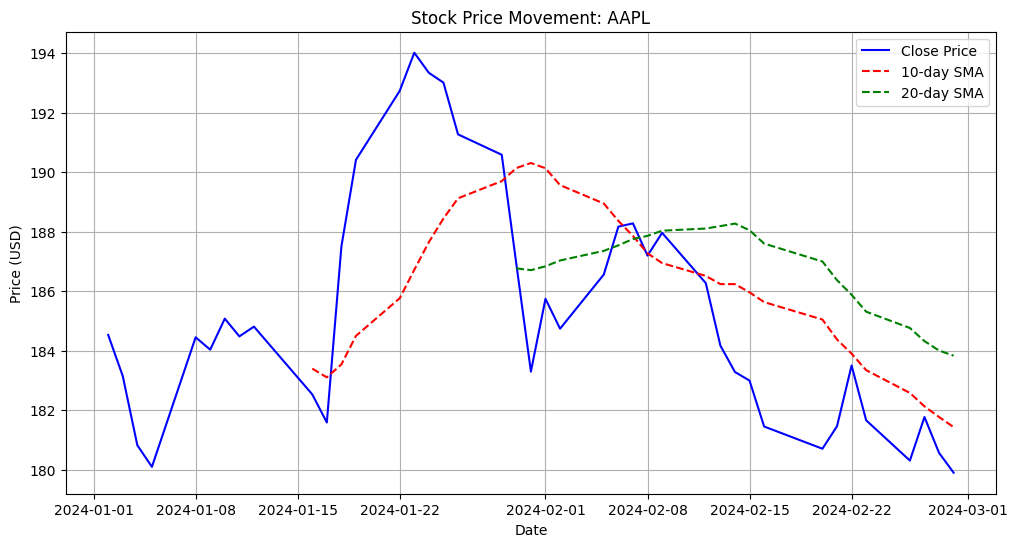

In [4]:
import yfinance as yf  # Import Yahoo Finance API to fetch stock data
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import pandas as pd  # Import Pandas for data manipulation

def plot_stock_movement(ticker, start_date, end_date):
    # Fetch historical stock data for the given ticker and date range
    stock = yf.download(ticker, start=start_date, end=end_date)

    # Check if data is available; if not, display a message and exit
    if stock.empty:
        print("No data found for the given stock ticker.")
        return

    # Calculate the 10-day Simple Moving Average (SMA) to identify short-term trends
    stock['SMA_10'] = stock['Close'].rolling(window=10).mean()

    # Calculate the 20-day Simple Moving Average (SMA) to identify slightly longer trends
    stock['SMA_20'] = stock['Close'].rolling(window=20).mean()

    # Create a new figure with a specific size to improve readability
    plt.figure(figsize=(12,6))

    # Plot the closing price of the stock as a blue line
    plt.plot(stock.index, stock['Close'], label='Close Price', color='blue')

    # Plot the 10-day moving average as a red dashed line
    plt.plot(stock.index, stock['SMA_10'], label='10-day SMA', color='red', linestyle='dashed')

    # Plot the 20-day moving average as a green dashed line
    plt.plot(stock.index, stock['SMA_20'], label='20-day SMA', color='green', linestyle='dashed')

    # Set the title of the graph with the stock ticker
    plt.title(f"Stock Price Movement: {ticker}")

    # Label the x-axis as "Date" to indicate time progression
    plt.xlabel("Date")

    # Label the y-axis as "Price (USD)" to indicate stock price values
    plt.ylabel("Price (USD)")

    # Display a legend to differentiate between price and moving averages
    plt.legend()

    # Enable grid lines for better visualization
    plt.grid()

    # Show the final plot to the user
    plt.show()

# Example usage:
# Define the stock ticker symbol (e.g., AAPL for Apple Inc.)
ticker_symbol = "AAPL"

# Define the start date for fetching historical stock data
start = "2024-01-01"

# Define the end date for fetching historical stock data
end = "2024-03-01"

# Call the function to fetch and plot stock price movements
plot_stock_movement(ticker_symbol, start, end)
